In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Fevrier

In [ ]:
import pandas as pd
import numpy as np
feb= pd.read_excel('/content/drive/MyDrive/projet 2 /feb-23.xlsx')

In [ ]:
feb.head()

,co_id,activation_date,total_nb_recharge,total_rechage,total_u_data,total_rev_option,total_rev_sos,total_u_out,total_u_in,usage_op1,...,usage_op3,nb_cont_out,nb_cont_in,nb_cell_visite_out,nb_cell_visite_in,entity_code,entity_type_name,nbr_contrat,nbr_actif,flag_churn
0,41084377,2023-02-24 14:00:28,1.0,5.0,6.879883,NaN,NaN,31.433,12.467,NaN,...,NaN,7.0,4.0,7.0,9.0,2,INDIRECT,3.0,3.0,0
1,569522,2023-02-03 17:51:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47,INDIRECT,1.0,0.0,1
2,40987858,2023-02-13 17:34:09,1.0,5.0,NaN,NaN,NaN,0.067,NaN,NaN,...,NaN,2.0,NaN,1.0,NaN,47,INDIRECT,3.0,2.0,1
3,40843509,2023-02-03 09:43:32,2.0,2.0,179641.630859,NaN,NaN,6.800,15.016,NaN,...,2.4,4.0,6.0,1.0,9.0,47,INDIRECT,6.0,3.0,0
4,6418540,2023-02-24 02:32:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47,INDIRECT,6.0,1.0,1


In [ ]:

# Conversion de la colonne date en datetime
feb['activation_date'] = pd.to_datetime(feb['activation_date'])

# Tri des données par date
feb = feb.sort_values(by='activation_date')


In [ ]:
  print(feb.activation_date.dtypes)

datetime64[ns]


In [ ]:
print(feb.isna().mean() * 100)


co_id                  0.000000
activation_date        0.000000
total_nb_recharge     11.527633
total_rechage         11.527633
total_u_data          17.447289
total_rev_option      47.497122
total_rev_sos         99.744090
total_u_out            3.995610
total_u_in            32.290505
usage_op1             99.605566
usage_op2             95.059008
usage_op3             39.258087
nb_cont_out            4.830353
nb_cont_in             4.914457
nb_cell_visite_out     4.830353
nb_cell_visite_in      4.914457
entity_code            0.128630
entity_type_name       0.128630
nbr_contrat            0.001799
nbr_actif              0.001799
flag_churn             0.000000
dtype: float64


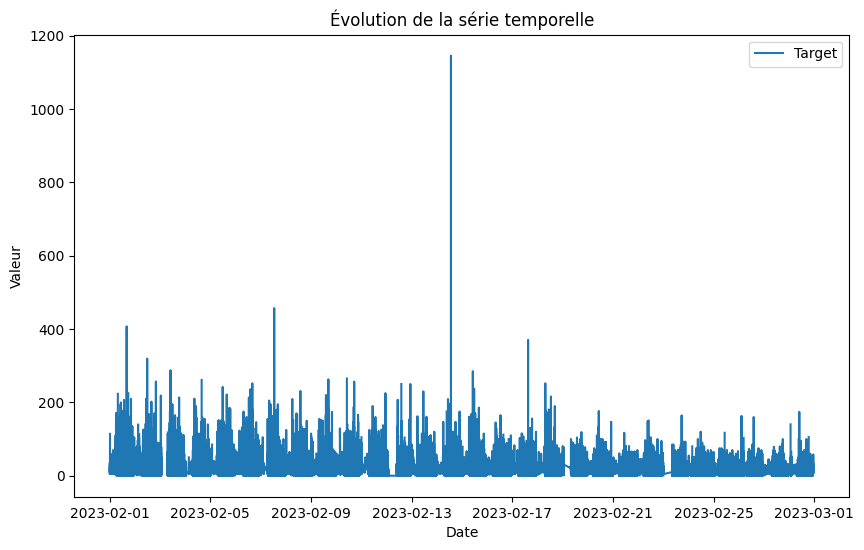

In [ ]:
import matplotlib.pyplot as plt

# Visualisation de la cible
plt.figure(figsize=(10, 6))
plt.plot(feb['activation_date'], feb['total_rechage'], label='Target')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Évolution de la série temporelle')
plt.legend()
plt.show()


In [ ]:
df = feb[['activation_date','total_rechage']]
df

,activation_date,total_rechage
64199,2023-02-01 00:00:39,23.0
72088,2023-02-01 00:00:39,10.0
16455,2023-02-01 00:08:11,5.0
16493,2023-02-01 00:09:31,5.0
16469,2023-02-01 00:11:33,15.0
...,...,...
140947,2023-02-28 23:41:25,NaN
212972,2023-02-28 23:42:31,17.0
142497,2023-02-28 23:43:48,NaN
120553,2023-02-28 23:45:15,10.0


In [ ]:
import pandas as pd

# Si votre dataset est dans un fichier CSV
# df = pd.read_csv('votre_fichier.csv')

# Conversion de la colonne "activation_date" en format datetime
df['activation_date'] = pd.to_datetime(df['activation_date'])
df.set_index('activation_date', inplace=True)

In [ ]:
# Regrouper les données par heure et sommer les valeurs de total_recharge
df_hourly = df.resample('H')['total_rechage'].sum()

# Renommer les colonnes pour clarté
df_hourly.columns = ['date_hour', 'total_rechage']
df_hourly.head()


,total_rechage
activation_date,
2023-02-01 00:00:00,804.161000
2023-02-01 01:00:00,567.256000
2023-02-01 02:00:00,364.256000
2023-02-01 03:00:00,610.116002
2023-02-01 04:00:00,362.940002


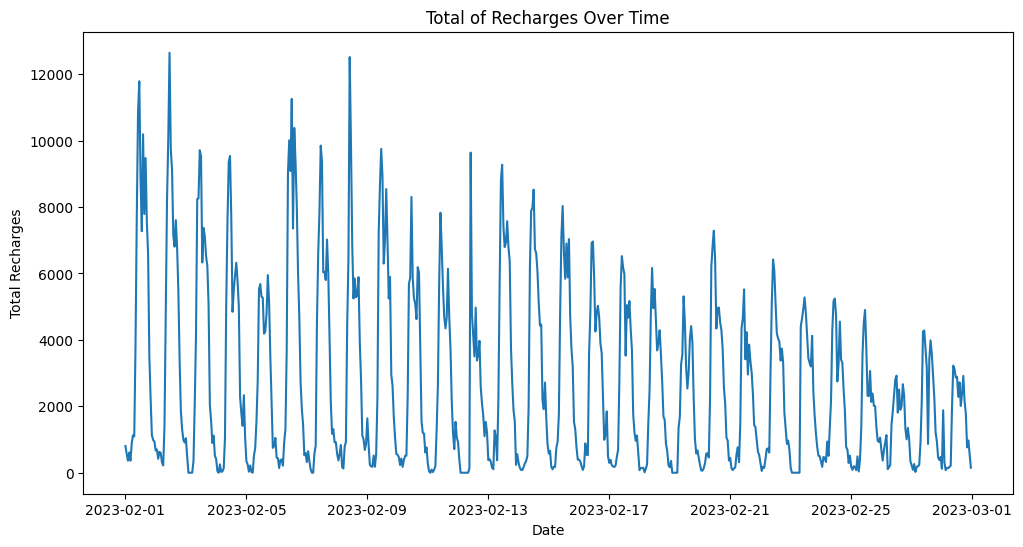

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly) # df_hourly contains the 'total_rechage' data directly
plt.title('Total of Recharges Over Time')
plt.xlabel('Date')
plt.ylabel('Total Recharges')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose


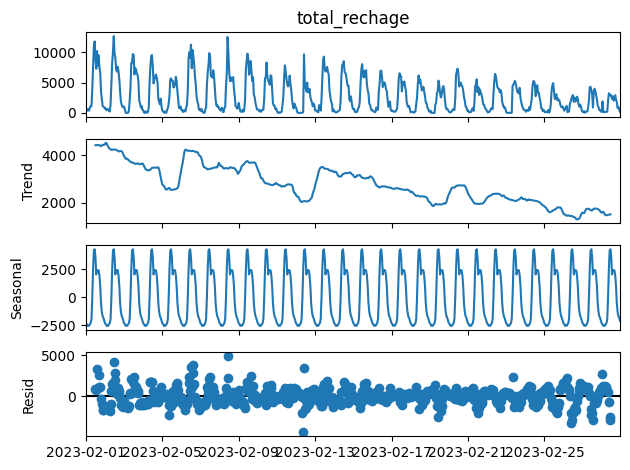

In [ ]:
# Perform seasonal decomposition (additive model)
decompose_result = seasonal_decompose(df_hourly, model='additive', period=24)

# Plot the decomposed components
decompose_result.plot()
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
from random import random

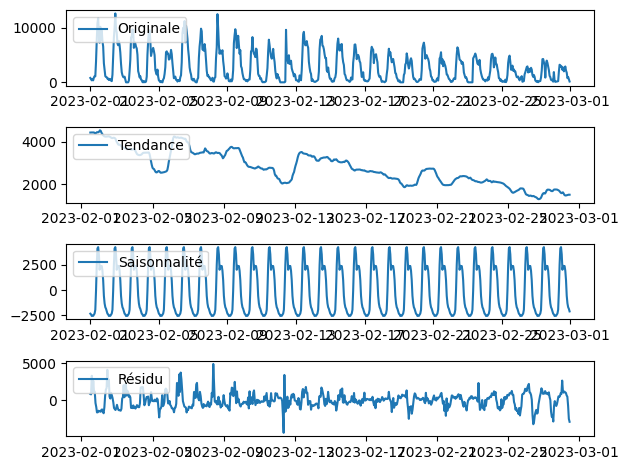

In [ ]:
# Décomposition de la série temporelle avec un modèle additif
decomposition = seasonal_decompose(df_hourly, model='additive', period=24)  # 24 for daily seasonality


# Extraction des composantes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Affichage des composantes
plt.subplot(411)
plt.plot(df_hourly, label='Originale')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Tendance')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Saisonnalité')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Résidu')
plt.legend(loc='upper left')
plt.tight_layout()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Application du test ADF
result = adfuller(df_hourly.dropna())  # Assurez-vous qu'il n'y a pas de valeurs NaN

# Extraction des résultats
print("Statistique ADF : {:.4f}".format(result[0]))
print("P-valeur : {:.4f}".format(result[1]))
print("Valeurs critiques :")
for key, value in result[4].items():
    print(f"  {key}: {value:.4f}")

# Interprétation
if result[1] <= 0.05:
    print("\nLa série est stationnaire (on rejette l'hypothèse nulle).")
else:
    print("\nLa série n'est pas stationnaire (on ne peut pas rejeter l'hypothèse nulle).")


Statistique ADF : -3.0582
P-valeur : 0.0298
Valeurs critiques :
  1%: -3.4404
  5%: -2.8660
  10%: -2.5691

La série est stationnaire (on rejette l'hypothèse nulle).


S-**arima**

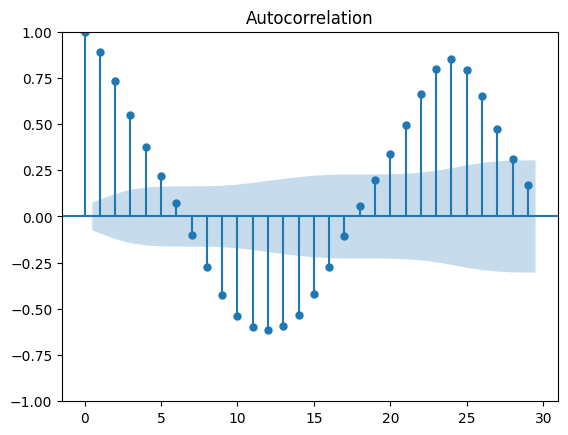

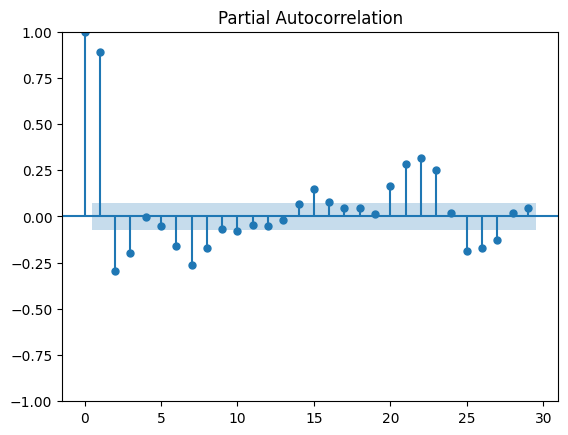

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF et PACF
plot_acf(df_hourly)
plot_pacf(df_hourly)
plt.show()


**SARIMA**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Définir les paramètres SARIMA
p, d, q = 1, 0, 1  # Non saisonnier
P, D, Q, s = 1, 0, 1, 24  # Saisonnière

# Ajuster le modèle
model = SARIMAX(df_hourly, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Résumé des résultats
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      total_rechage   No. Observations:                  672
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood               -5468.846
Date:                            Fri, 07 Feb 2025   AIC                          10947.692
Time:                                    09:14:58   BIC                          10970.244
Sample:                                02-01-2023   HQIC                         10956.426
                                     - 02-28-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8688      0.019     46.674      0.000       0.832       0.905
ma.L1         -0.3690      0.028   

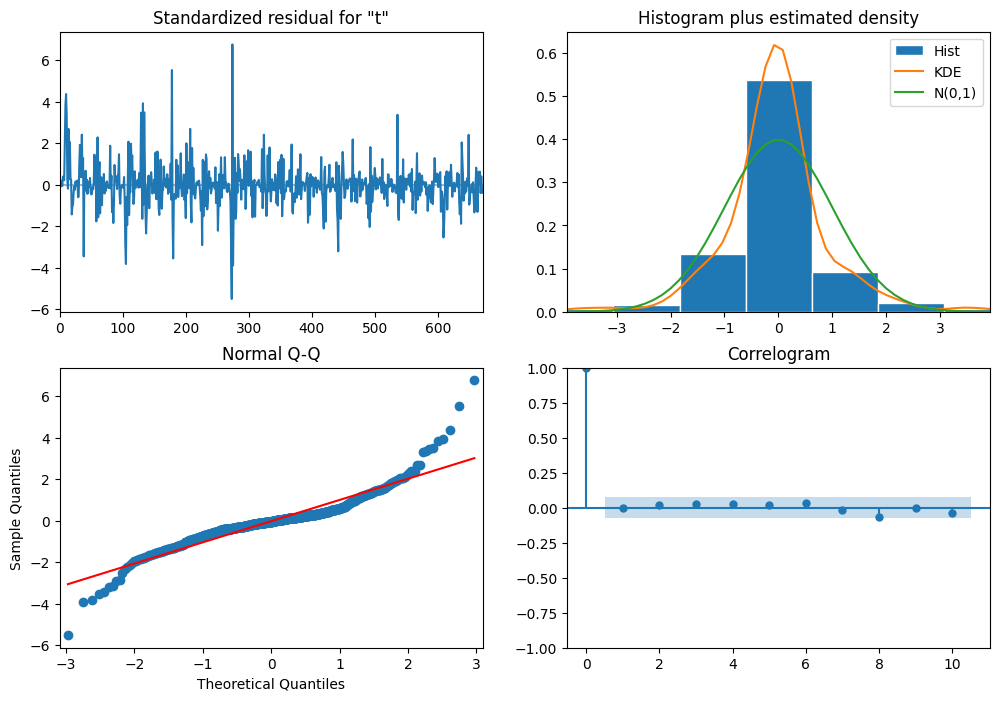

In [ ]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()


**TRAIN TEST**

In [ ]:
# Define train and test split (80% train, 20% test)
train_size = int(len(df_hourly) * 0.8)
train, test = df_hourly[:train_size], df_hourly[train_size:]


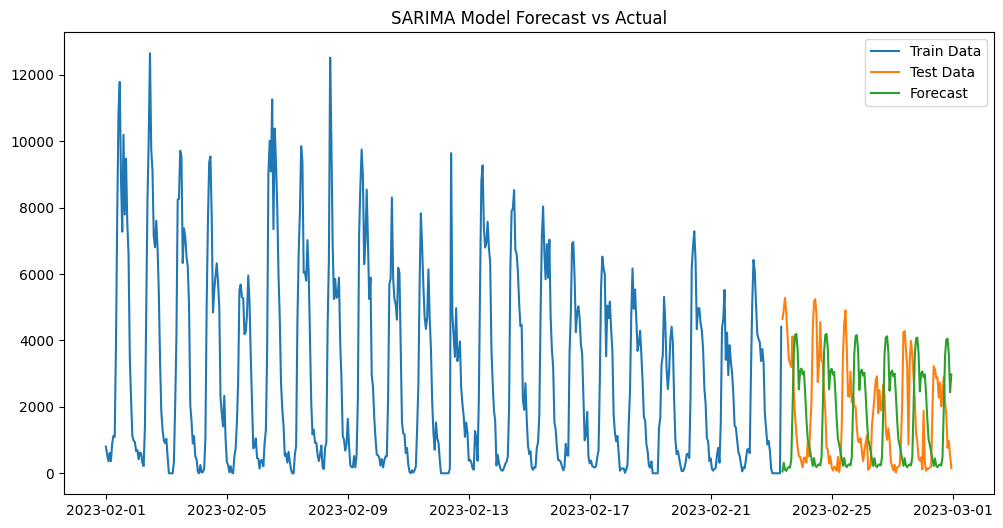

In [ ]:
# Forecast for the same length as the test set
forecast = results.forecast(steps=len(test))

# Plot the actual vs. forecasted values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='Forecast')
plt.title('SARIMA Model Forecast vs Actual')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 2293.68
Mean Squared Error (MSE): 6554626.52
Root Mean Squared Error (RMSE): 2560.20


In [ ]:
print("Moyenne des valeurs réelles :", df_hourly.mean())
print("Médiane des valeurs réelles :", df_hourly.median())


Moyenne des valeurs réelles : 2764.3512055503115
Médiane des valeurs réelles : 1733.9065020382404


# **Transformation logarithmique **

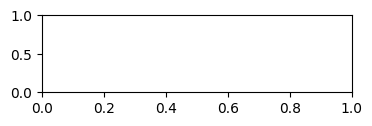

In [ ]:
df_hourly1 = np.log(df_hourly)


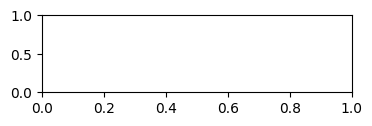

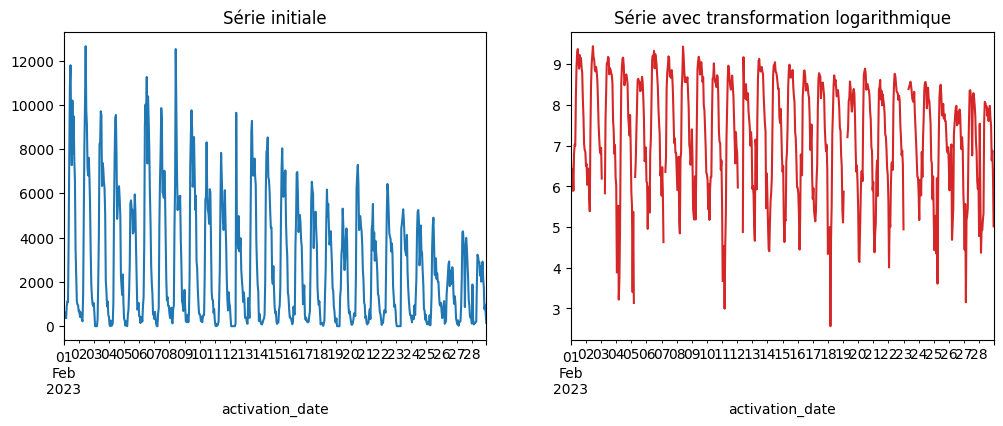

In [ ]:
# Création de sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df_hourly.plot(title="Série initiale", color="tab:blue", ax=ax1,  legend=False)

df_hourly1.plot(title="Série avec transformation logarithmique", color="tab:red", ax=ax2,  legend=False)

plt.show()


activation_date
2023-02-01 00:00:00    6.689799
2023-02-01 01:00:00    6.340811
2023-02-01 02:00:00    5.897857
2023-02-01 03:00:00    6.413649
2023-02-01 04:00:00    5.894238
                         ...   
2023-02-28 19:00:00    7.485949
2023-02-28 20:00:00    6.638344
2023-02-28 21:00:00    6.878590
2023-02-28 22:00:00    6.310562
2023-02-28 23:00:00    5.017280
Freq: h, Name: total_rechage, Length: 672, dtype: float64
Total NaN values: 0
Any infinite values: 28


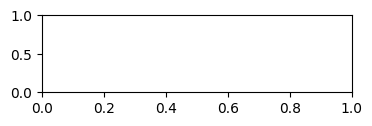

In [ ]:
print(df_hourly1)
print("Total NaN values:", df_hourly1.isna().sum())
print("Any infinite values:", np.isinf(df_hourly1).sum())

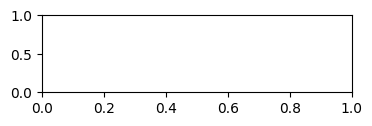

In [ ]:
df_hourly1= df_hourly1.replace([np.inf, -np.inf], np.nan).dropna()

In [ ]:
# Compute variance correctly
variance = df_hourly1.var()  # Calculate the variance of the Series

# If variance is too small, add a small constant
if variance < 1e-6:
     df_hourly1 += 1e-6

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_hourly1.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[1] <= 0.05:
    print("La série est stationnaire.")
else:
    print("La série n'est pas stationnaire.")


ADF Statistic: -3.9836355934957894
p-value: 0.0014986662397180864
Critical Values: {'1%': -3.440890045708521, '5%': -2.8661904001753618, '10%': -2.569246579178572}
La série est stationnaire.


In [ ]:
# Différenciation de première ordre
df_diff = df_hourly1.diff().dropna()

In [ ]:
df_diff.head()

,total_rechage
activation_date,
2023-02-01 01:00:00,-0.348989
2023-02-01 02:00:00,-0.442954
2023-02-01 03:00:00,0.515792
2023-02-01 04:00:00,-0.519412
2023-02-01 05:00:00,0.898461


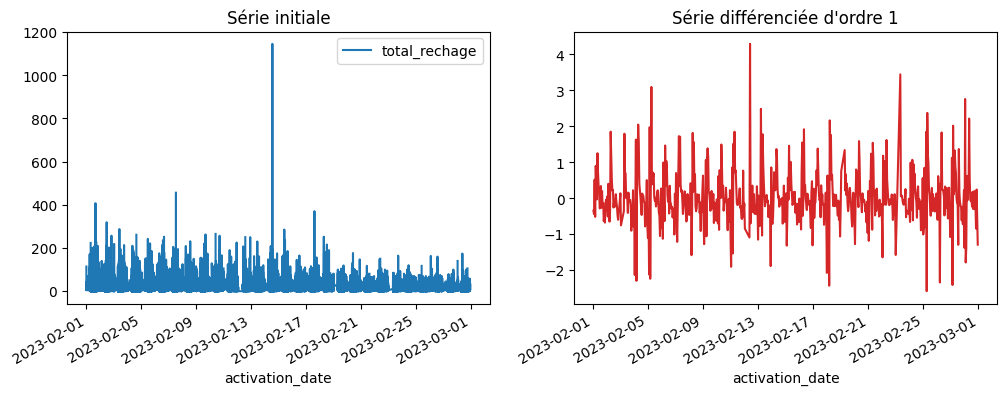

In [ ]:
# Création de sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Tracé de la série initiale et différenciée
df.plot(title="Série initiale",color="tab:blue", ax=ax1)

df_diff.plot(title="Série différenciée d'ordre 1", color="tab:red", ax=ax2)

plt.show()

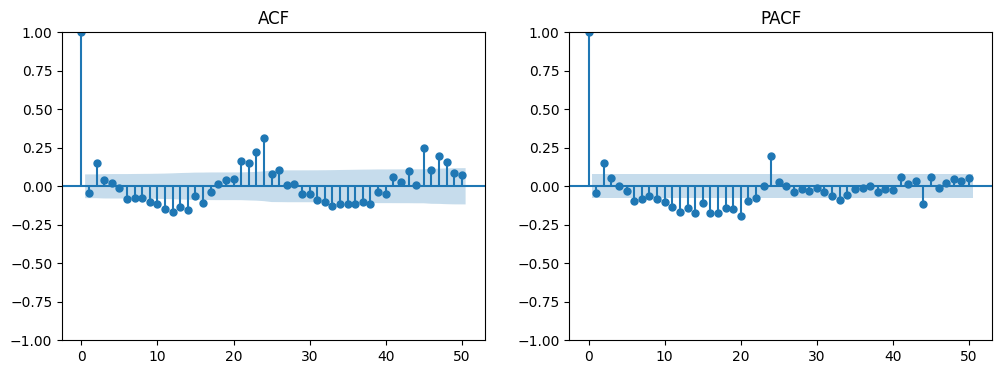

In [ ]:
# Création d'une figure avec deux sous-graphiques
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(12, 4))

# Tracé de la fonction d'autocorrélation (ACF) pour la série différenciéé deux fois

plot_acf(df_diff, lags=50, ax=ax1)
ax1.set_title('ACF')

# Tracé de la fonction d'autocorrélation partielle (PACF) pour la série différenciéé deux fois
plot_pacf(df_diff, lags=50, ax=ax2)
ax2.set_title('PACF')

plt.show()

In [ ]:
df_diff2=df_diff.diff(24).dropna()

In [ ]:
print('-------------Résultats du Test Dickey Fuller-------------')

result = adfuller(df_diff2, autolag='AIC')

# Affiche la statistique du test et la valeur p
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpréter les résultats
if result[1] < 0.05:
    print('La série est stationnaire.')
else:
    print('La série est non-stationnaire.')

-------------Résultats du Test Dickey Fuller-------------
ADF Statistic: -10.404955
p-value: 0.000000
La série est stationnaire.


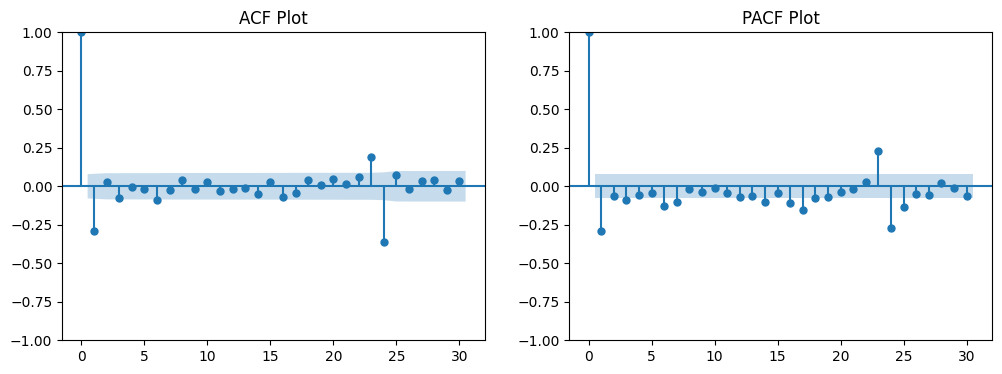

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF Plot
plot_acf(df_diff2, lags=30, ax=ax1)
ax1.set_title('ACF Plot')

# PACF Plot
plot_pacf(df_diff2, lags=30, ax=ax2)
ax2.set_title('PACF Plot')

plt.show()

In [ ]:
#On va ajuster le modéle SARIMA(2,1,2)(1,1,1,12)

model_S1 = ARIMA(train, order = (1,2,1), seasonal_order=(1,1,2,24))
model_S1_fit = model_S1.fit()
print(model_S1_fit.summary())

                                       SARIMAX Results                                       
Dep. Variable:                         total_rechage   No. Observations:                  537
Model:             ARIMA(1, 2, 1)x(1, 1, [1, 2], 24)   Log Likelihood               -4198.782
Date:                               Fri, 07 Feb 2025   AIC                           8409.563
Time:                                       10:32:42   BIC                           8434.981
Sample:                                   02-01-2023   HQIC                          8419.528
                                        - 02-23-2023                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3854      0.022    -17.243      0.000      -0.429      -0.342
ma.L1      

# Deuxieme transformation LOG1

In [ ]:
import numpy as np

# Ensure 'total_rechage' is of numeric type before applying log1p
df_hourly['total_rechage'] = pd.to_numeric(df_hourly['total_rechage'], errors='coerce')

# Then apply the log transformation
df_hourly['log_total_rechage'] = np.log1p(df_hourly['total_rechage'])

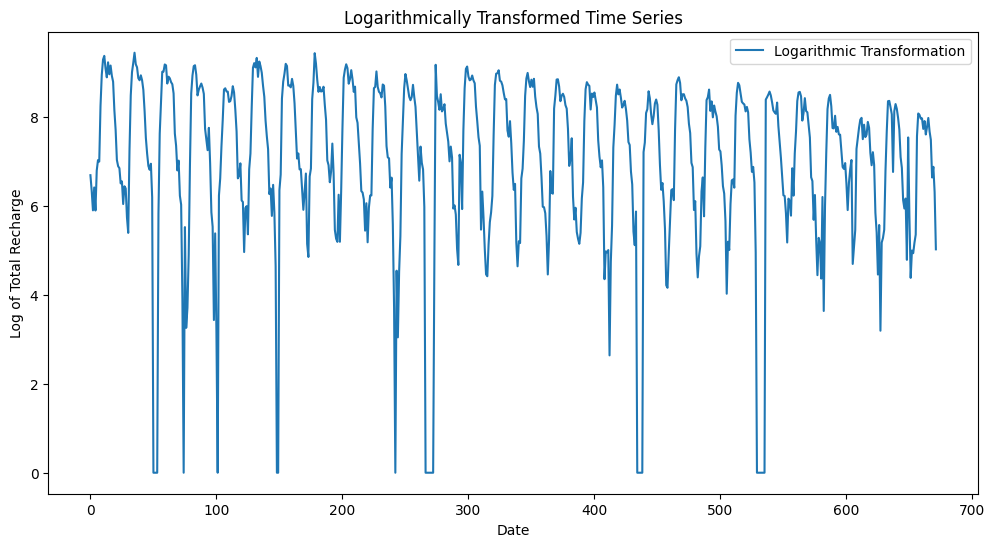

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['log_total_rechage'], label='Logarithmic Transformation')
plt.title('Logarithmically Transformed Time Series')
plt.xlabel('Date')
plt.ylabel('Log of Total Recharge')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_hourly['log_total_rechage'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[1] <= 0.05:
    print("La série est stationnaire.")
else:
    print("La série n'est pas stationnaire.")


ADF Statistic: -4.865715667777824
p-value: 4.064858376831092e-05
Critical Values: {'1%': -3.440434903803665, '5%': -2.865989920612213, '10%': -2.569139761751388}
La série est stationnaire.


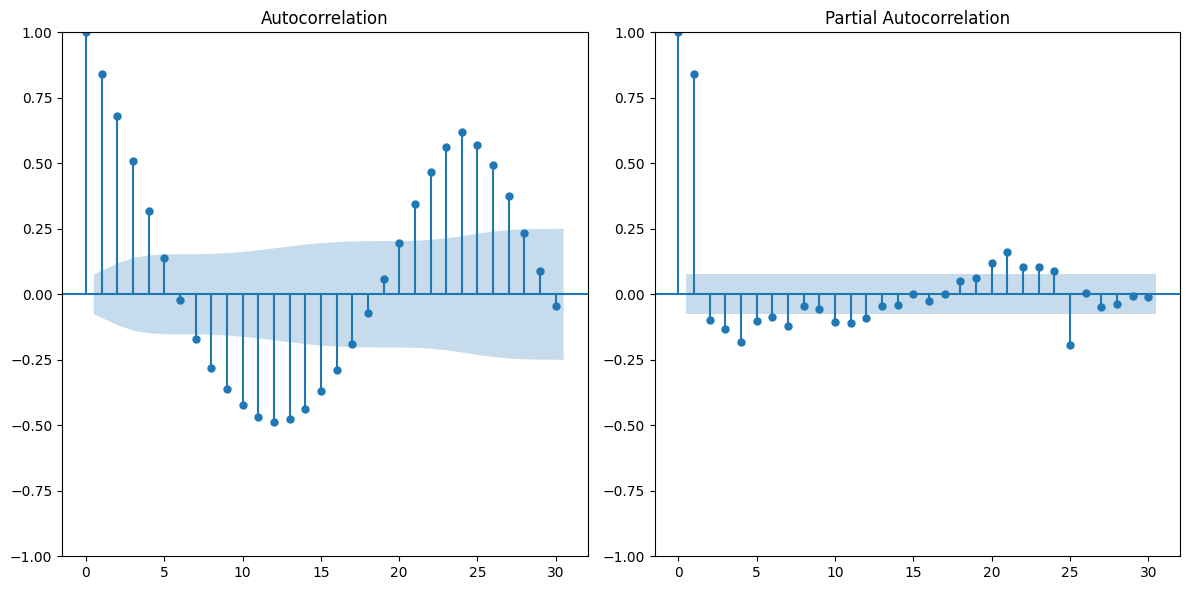

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assurez-vous que les données nulles sont supprimées après la différenciation
plt.figure(figsize=(12, 6))
plot_acf(df_hourly['log_total_rechage'].dropna(), lags=30, ax=plt.subplot(121))
plot_pacf(df_hourly['log_total_rechage'].dropna(), lags=30, ax=plt.subplot(122))
plt.tight_layout()
plt.show()

In [ ]:
# Ajuster le modèle
model = SARIMAX(df_hourly['log_total_rechage'].dropna(),
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 24))
results = model.fit()

# Résumé des résultats
print(results.summary())

# Prévision
df_hourly['log_predictions'] = results.fittedvalues

                                     SARIMAX Results                                      
Dep. Variable:                  log_total_rechage   No. Observations:                  672
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -881.232
Date:                            Fri, 07 Feb 2025   AIC                           1772.464
Time:                                    10:38:38   BIC                           1794.826
Sample:                                         0   HQIC                          1781.140
                                            - 672                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6907      0.020     34.352      0.000       0.651       0.730
ma.L1         -0.9999      0.738   

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Définir les paramètres du modèle
p, d, q = 1, 0, 1  # Ajuster selon ACF/PACF
P, D, Q, s = 1, 0, 1, 24  # Ajuster selon la saisonnalité (s=24 pour saisonnalité quotidienne)

# Ajuster le modèle
model = SARIMAX(df_hourly['log_total_rechage'].dropna(),
                order=(p, d, q),
                seasonal_order=(P, D, Q, s))
results = model.fit()

# Résumé des résultats
print(results.summary())

# Prévision
df_hourly['log_predictions'] = results.fittedvalues


                                     SARIMAX Results                                      
Dep. Variable:                  log_total_rechage   No. Observations:                  672
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood                -929.190
Date:                            Fri, 07 Feb 2025   AIC                           1868.380
Time:                                    10:39:44   BIC                           1890.931
Sample:                                         0   HQIC                          1877.114
                                            - 672                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8319      0.017     48.174      0.000       0.798       0.866
ma.L1         -0.1209      0.033   

In [ ]:
# Prédictions sur les données
df_hourly['log_predictions'] = results.fittedvalues

# Inversion de la transformation logarithmique
df_hourly['predictions'] = np.expm1(df_hourly['log_predictions'])  # Retour à l'échelle originale


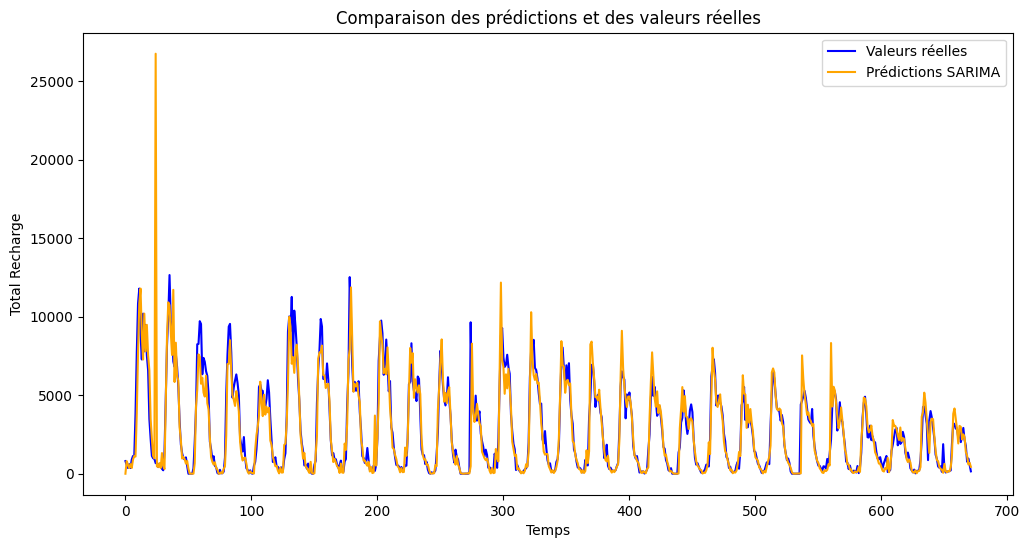

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_hourly['total_rechage'], label='Valeurs réelles', color='blue')
plt.plot(df_hourly['predictions'], label='Prédictions SARIMA', color='orange')
plt.legend()
plt.title("Comparaison des prédictions et des valeurs réelles")
plt.xlabel("Temps")
plt.ylabel("Total Recharge")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Valeurs réelles et prédites
y_true = df_hourly['total_rechage'].dropna()
y_pred = df_hourly['predictions'].dropna()

# Calcul des métriques
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
aic = results.aic
bic = results.bic
log_likelihood = results.llf

# Affichage des résultats
print(f"MAE : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAPE : {mape:.2f}%")
print(f"AIC : {aic:.2f}")
print(f"BIC : {bic:.2f}")
print(f"Log-Likelihood : {log_likelihood:.2f}")


MAE : 645.0685
RMSE : 1440.2598
MAPE : inf%
AIC : 1466.06
BIC : 1487.26
Log-Likelihood : -728.03


In [ ]:
!pip install prophet


In [ ]:
df_hourly.head()

,index,activation_date,total_rechage,log_total_rechage,log_predictions,predictions
0,0,2023-02-01 00:00:00,804.161000,6.691042,0.000000,0.000000
1,1,2023-02-01 01:00:00,567.256000,6.342572,5.286699,804.160313
2,2,2023-02-01 02:00:00,364.256000,5.900598,5.176071,567.255716
3,3,2023-02-01 03:00:00,610.116002,6.415287,4.852428,364.255915
4,4,2023-02-01 04:00:00,362.940002,5.896989,5.185395,610.115823


In [ ]:
# Vérifier le type de la colonne activation_date
print(df_hourly['activation_date'].dtype)

# Convertir en datetime si nécessaire
df_hourly['activation_date'] = pd.to_datetime(df_hourly['activation_date'], errors='coerce')

# Vérifier s'il y a des NaN après la conversion (signale des erreurs de format)
print(df_hourly['activation_date'].isna().sum())

# Supprimer les lignes avec des dates non reconnues (optionnel)
df_hourly = df_hourly.dropna(subset=['activation_date'])


object
1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps4q71b3h/cg28kmpv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps4q71b3h/srp84tmm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98522', 'data', 'file=/tmp/tmps4q71b3h/cg28kmpv.json', 'init=/tmp/tmps4q71b3h/srp84tmm.json', 'output', 'file=/tmp/tmps4q71b3h/prophet_modelas2k0ze_/prophet_model-20250207105121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:51:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:51:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


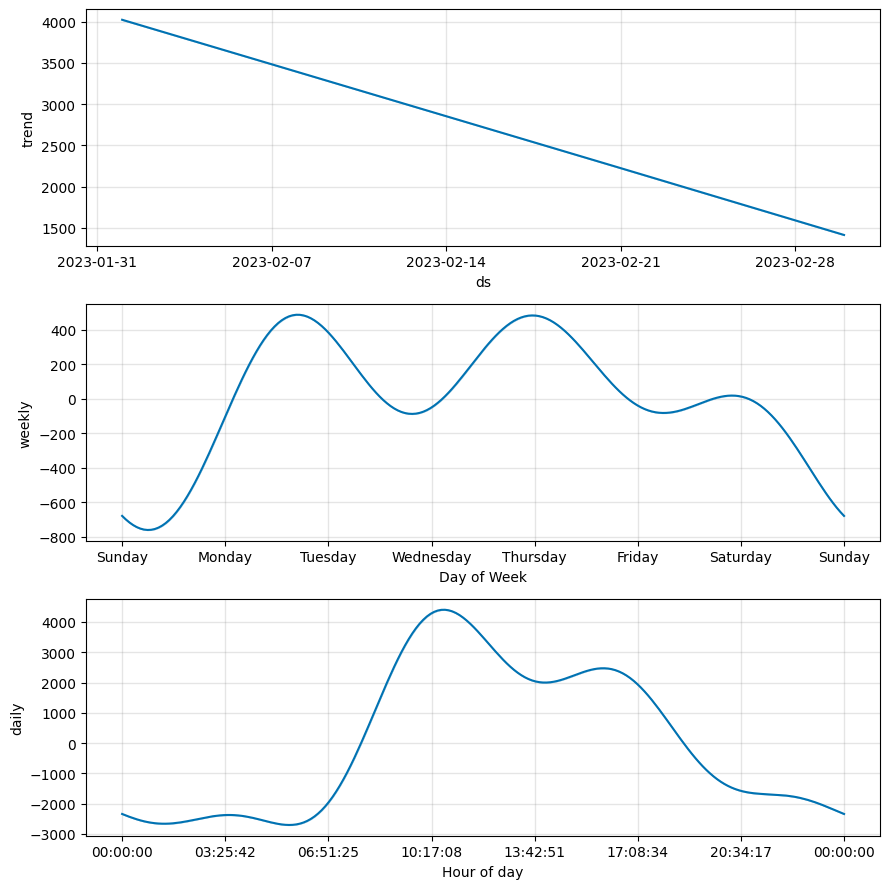

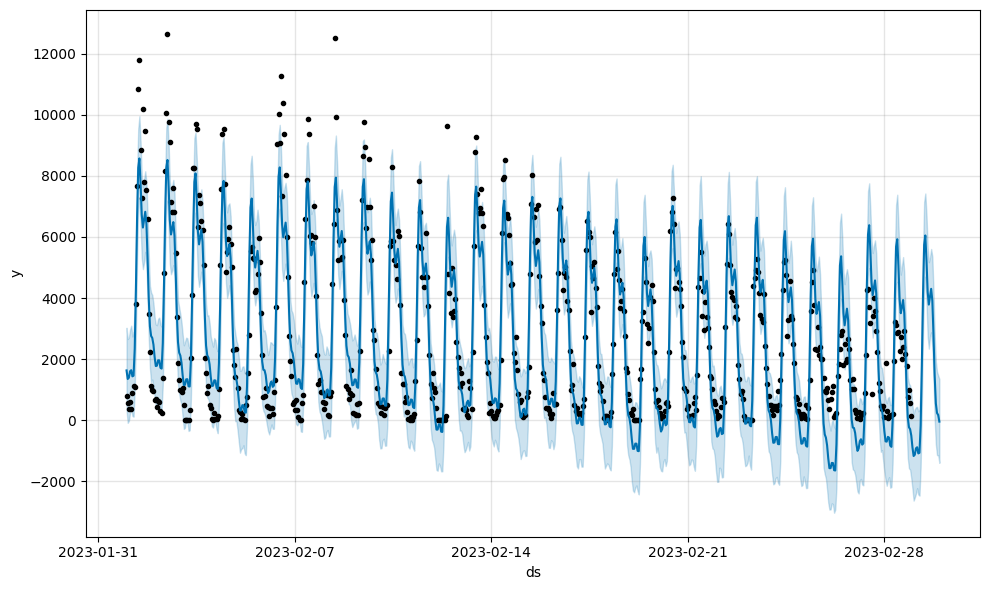

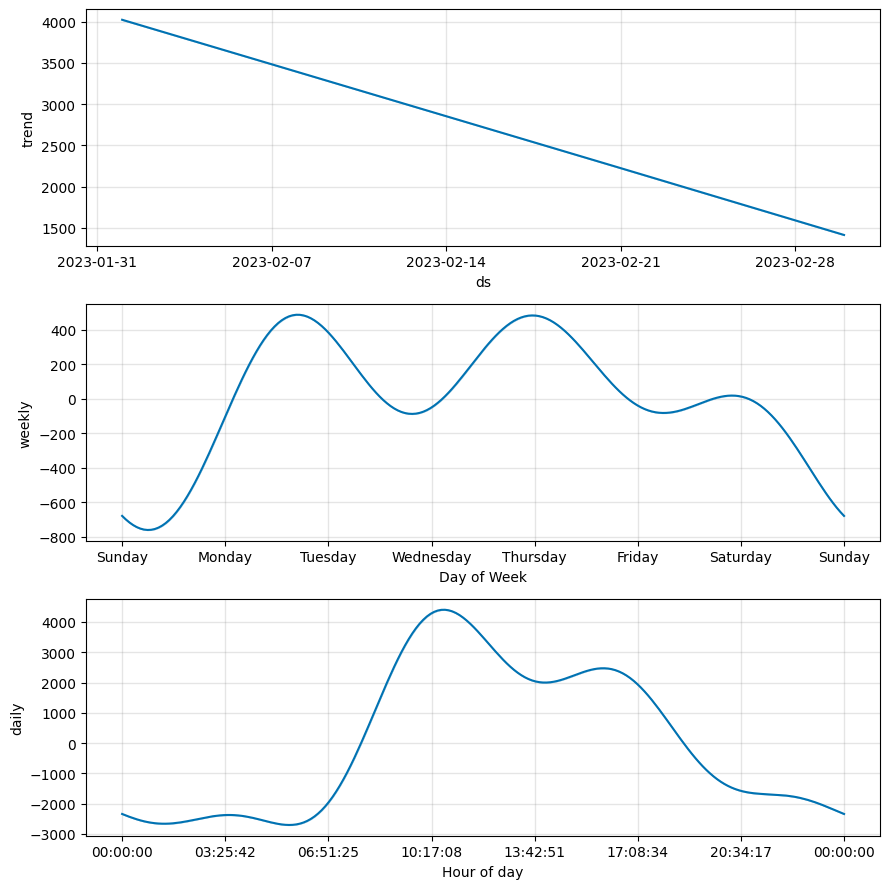

In [ ]:
from prophet import Prophet
import pandas as pd

# Vérifier et convertir les dates
df_hourly['activation_date'] = pd.to_datetime(df_hourly['activation_date'], errors='coerce')
df_hourly = df_hourly.dropna(subset=['activation_date'])  # Supprimer les erreurs

# Préparer les données
df_prophet = df_hourly[['activation_date', 'total_rechage']].rename(columns={'activation_date': 'ds', 'total_rechage': 'y'})

# Définir et ajuster le modèle
model = Prophet()
model.fit(df_prophet)

# Faire une prévision de 24 heures
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

# Visualiser la prévision
model.plot(forecast)
model.plot_components(forecast)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Comparer les données réelles et prédites
y_true = df_prophet['y'][-24:]  # Dernières valeurs réelles
y_pred = forecast['yhat'][-24:]  # Dernières prévisions

# Calcul des métriques
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


MAE: 1249.045983171882, MSE: 2321292.7794982414, RMSE: 1523.578937731236


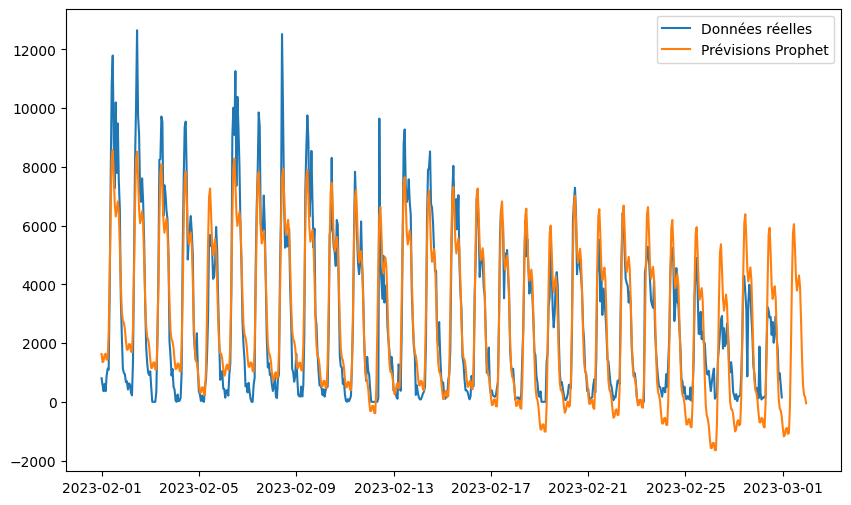

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label="Données réelles")
plt.plot(forecast['ds'], forecast['yhat'], label="Prévisions Prophet")
# Ajouter SARIMA et SARIMAX ici
plt.legend()
plt.show()
